In [1]:
pip install sdv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.4/146.4 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 85.0 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.9/51.9 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.2/65.2 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.5/170.5 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 56.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 79.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 kB 4.8 MB/s eta 0:00:00
  Attempting uninstall: platformdirs
    Found existing installation: platformdirs 3.11.0
    Uninstalling platformdirs-3.11.0:
      Successfully uninstalled platformdirs-3.11.0
  Attempting uninstall: plotly
    Found existing installation: plotly 5.18.0
    Uninstal

In [2]:
pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 28.6 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 23.3.2
    Uninstalling pip-23.3.2:
      Successfully uninstalled pip-23.3.2
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install table_evaluator

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 92.5 MB/s eta 0:00:00:00:010:01
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf 24.6.1 requires cubinlinker, which is not installed.
cudf 24.6.1 requires cupy-cuda11x>=12.0.0, which is not installed.
cudf 24.6.1 requires ptxcompiler, which is not installed.
cuml 24.6.1 requires cupy-cuda11x>=12.0.0, which is not installed.
dask-cudf 24.6.1 requires cupy-cuda11x>=12.0.0, which is not installed.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.
beatrix-jupyterlab 2023.128.151533 requires jupyterlab~=3.6.0, but you have jupyterlab 4.2.3 which is incompatible.
cudf 24.6.1 requires cuda-python<12.0a0,>=11.7.1, but you have cuda-

In [4]:
import pandas as pd
from sdmetrics.reports.single_table import QualityReport
from ctgan import CTGAN
from rdt import HyperTransformer

In [5]:
real_data = pd.read_csv("/kaggle/input/cedit-card-csv/creditcard.csv")

In [6]:
df = pd.DataFrame(real_data)

print(df.columns)

print("Original DataFrame:")
print(df)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
Original DataFrame:
            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.63051

In [7]:
NUM_ROWS = 100000
NUM_EPOCHS = 1000
BATCH_SIZE = 1500

In [8]:
ht = HyperTransformer()
ht.detect_initial_config(data = df)
detected_config = ht.get_config()
display(detected_config)

{
    "sdtypes": {
        "Time": "numerical",
        "V1": "numerical",
        "V2": "numerical",
        "V3": "numerical",
        "V4": "numerical",
        "V5": "numerical",
        "V6": "numerical",
        "V7": "numerical",
        "V8": "numerical",
        "V9": "numerical",
        "V10": "numerical",
        "V11": "numerical",
        "V12": "numerical",
        "V13": "numerical",
        "V14": "numerical",
        "V15": "numerical",
        "V16": "numerical",
        "V17": "numerical",
        "V18": "numerical",
        "V19": "numerical",
        "V20": "numerical",
        "V21": "numerical",
        "V22": "numerical",
        "V23": "numerical",
        "V24": "numerical",
        "V25": "numerical",
        "V26": "numerical",
        "V27": "numerical",
        "V28": "numerical",
        "Amount": "numerical",
        "Class": "numerical"
    },
    "transformers": {
        "Time": FloatFormatter(),
        "V1": FloatFormatter(),
        "V2": FloatFor

In [9]:
ht.fit(df)
transformed_df = ht.transform(df)
transformed_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0.0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0.0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0.0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0.0


In [10]:
import time

start_time = time.time()  # Capture start time before training

model = CTGAN(
    epochs=NUM_EPOCHS,
    verbose=True,
    batch_size=BATCH_SIZE,
    embedding_dim = 1024,
    discriminator_steps = 6,
    discriminator_dim = (512,512),
    cuda = True
)

model.fit(transformed_df)

# Training is finished, record end time
end_time = time.time()

# Calculate total training time in seconds
training_time = end_time - start_time

print(f"Training completed! Total time taken: {training_time:.2f} seconds")

Gen. (-0.61) | Discrim. (-0.23): 100%|██████████| 1000/1000 [8:35:09<00:00, 30.91s/it] 

Training completed! Total time taken: 31772.11 seconds


In [13]:
model.save("/kaggle/working/mymodel.pkl")

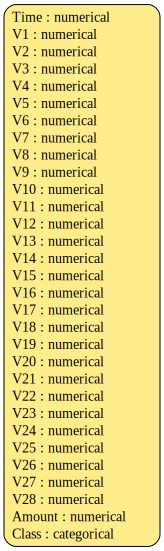

In [11]:
from sdv.metadata import SingleTableMetadata
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(df)
metadata_dict= metadata.to_dict()
metadata.visualize()

In [12]:
from sdmetrics.reports.single_table import QualityReport

# Get Synthetic data
synthetic_data = model.sample(NUM_ROWS)
# reverse transform the data
synthetic_data = ht.reverse_transform(synthetic_data)

report = QualityReport()
# Use the metadata OBJECT instead of the dictionary
report.generate(df, synthetic_data, metadata.to_dict())

cs_report = report.get_details(property_name="Column Shapes")
print(cs_report)

# Create the first figure
fig1 = report.get_visualization(property_name='Column Shapes')
fig1.show()

# Create the second figure
fig2 = report.get_visualization(property_name='Column Pair Trends')

fig2.show()

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 31/31 [00:03<00:00,  8.22it/s]|
Column Shapes Score: 97.68%

(2/2) Evaluating Column Pair Trends: |██████████| 465/465 [00:58<00:00,  8.01it/s]|
Column Pair Trends Score: 94.33%

Overall Score (Average): 96.01%

    Column        Metric     Score
0     Time  KSComplement  0.982951
1       V1  KSComplement  0.979056
2       V2  KSComplement  0.975435
3       V3  KSComplement  0.977906
4       V4  KSComplement  0.980112
5       V5  KSComplement  0.986434
6       V6  KSComplement  0.972286
7       V7  KSComplement  0.976814
8       V8  KSComplement  0.984725
9       V9  KSComplement  0.975473
10     V10  KSComplement  0.978565
11     V11  KSComplement  0.983073
12     V12  KSComplement  0.977829
13     V13  KSComplement  0.988409
14     V14  KSComplement  0.958855
15     V15  KSComplement  0.984607
16     V16  KSComplement  0.977587
17     V17  KSComplement  0.984040
18     V18  KSComplement  0.979782
19     V19  KSComple

In [14]:
from sdmetrics.visualization import get_column_plot

# Loop through each column in the dataframe
for column in df.columns:
    fig = get_column_plot(
        real_data=df,
        synthetic_data=synthetic_data,
        column_name=column,
    )

    fig.show()

LinAlgError: The data appears to lie in a lower-dimensional subspace of the space in which it is expressed. This has resulted in a singular data covariance matrix, which cannot be treated using the algorithms implemented in `gaussian_kde`. Consider performing principle component analysis / dimensionality reduction and using `gaussian_kde` with the transformed data.